<a href="https://colab.research.google.com/github/MTahaRF/EDA-on-World-Population/blob/main/EDA_on_World_Population_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Data Cleaning

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/manya-gangoli/World-Population-2024-EDA-and-prediction/refs/heads/main/World%20Population%20by%20country%202024.csv")
df.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801,1
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780,2
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   Population 2024  234 non-null    int64  
 2   Population 2023  234 non-null    int64  
 3   Area (km2)       234 non-null    object 
 4   Density (/km2)   234 non-null    float64
 5   Growth Rate      234 non-null    float64
 6   World %          228 non-null    float64
 7   World Rank       234 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 14.8+ KB


In [ ]:
df['Population Change'] = df['Population 2024'] - df['Population 2023']

In [ ]:
df["Area (km2)"].unique()

array(['3M', '9.4M', '9.1M', '1.9M', '770.9K', '910.8K', '8.4M', '130.2K',
       '16.4M', '1.1M', '364.5K', '298.2K', '1M', '2.3M', '313.4K',
       '1.6M', '783.6K', '349.4K', '510.9K', '885.8K', '241.9K', '547.6K',
       '1.2M', '295.7K', '569.1K', '652.7K', '97.6K', '200.5K', '499.6K',
       '434.1K', '2.4M', '2.7M', '652.2K', '306.1K', '9M', '446.3K',
       '579.4K', '2.1M', '440.6K', '528K', '786.4K', '227.5K', '1.3M',
       '328.6K', '143.3K', '581.8K', '318K', '882K', '472.7K', '7.7M',
       '120.4K', '183.6K', '36.2K', '273.6K', '61.9K', '94.3K', '743.4K',
       '743.5K', '230.1K', '627.3K', '248.4K', '107.2K', '192.5K',
       '33.7K', '176.5K', '386.9K', '245.7K', '24.7K', '112.8K', '25.7K',
       '155.4K', '27.6K', '30.3K', '48.3K', '88.8K', '631.9K', '103.8K',
       '111.9K', '407.3K', '452.9K', '77.2K', '82.6K', '138.8K', '128.9K',
       '91.6K', '91.3K', '71K', '203K', '21.6K', '54.4K', '72.2K',
       '82.5K', '39.5K', '230.8K', '1.1K', '120.3K', '87.5K', '1.8M

In [ ]:
def convert_to_number(value):
  if 'M' in value:
    return float(value.replace('M','')) * 1000000
  elif 'K' in value:
    return float(value.replace('K','')) * 1000
  elif '<' in value:
    return value.replace('<','')
  else:
    return float(value)

In [ ]:
df["Area (km2)"] = df["Area (km2)"].apply(convert_to_number)
df["Area (km2)"] = df["Area (km2)"].astype(float)

#Data Analysis

Text(0.5, 1.0, 'Top 10 Countries with Highest Population')

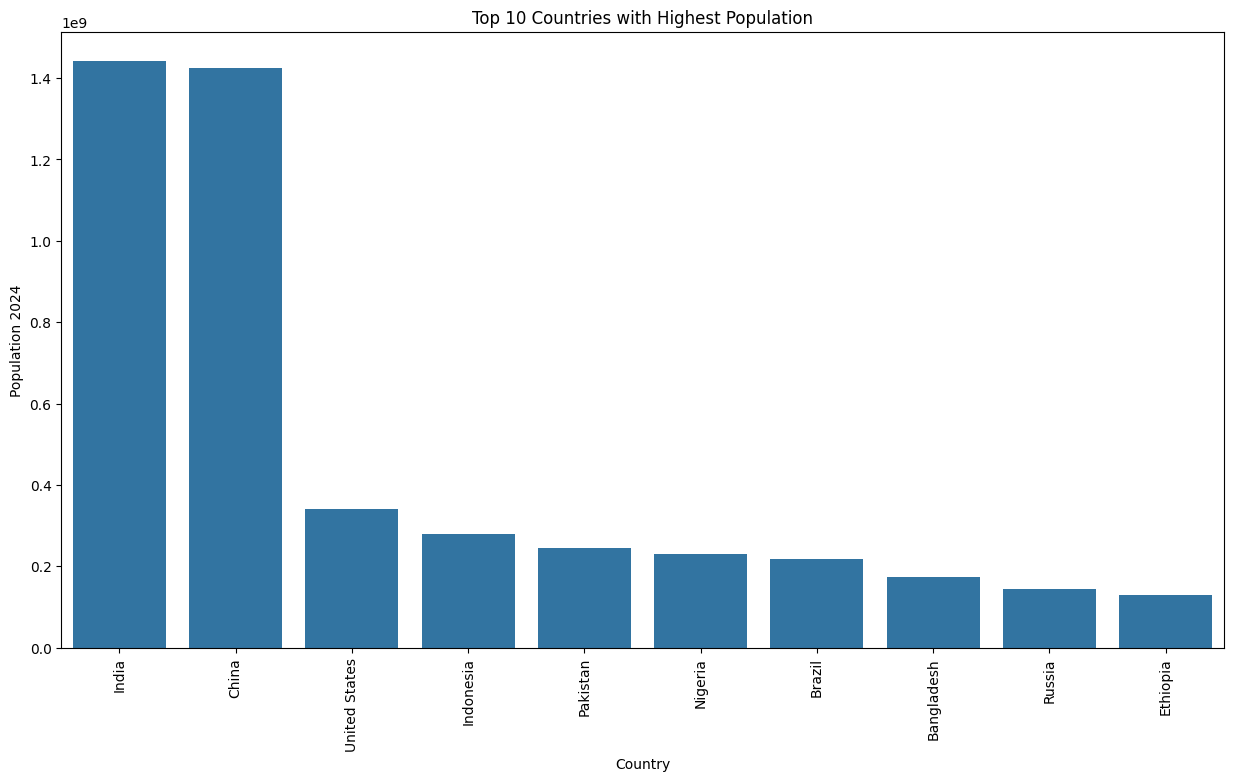

In [ ]:
plt.figure(figsize=(15,8))
country_values = df['Country']
population_values = df['Population 2024']
sns.barplot(x = country_values[:10],y = df['Population 2024'])
plt.xticks(rotation=90)
plt.title("Top 10 Countries with Highest Population")

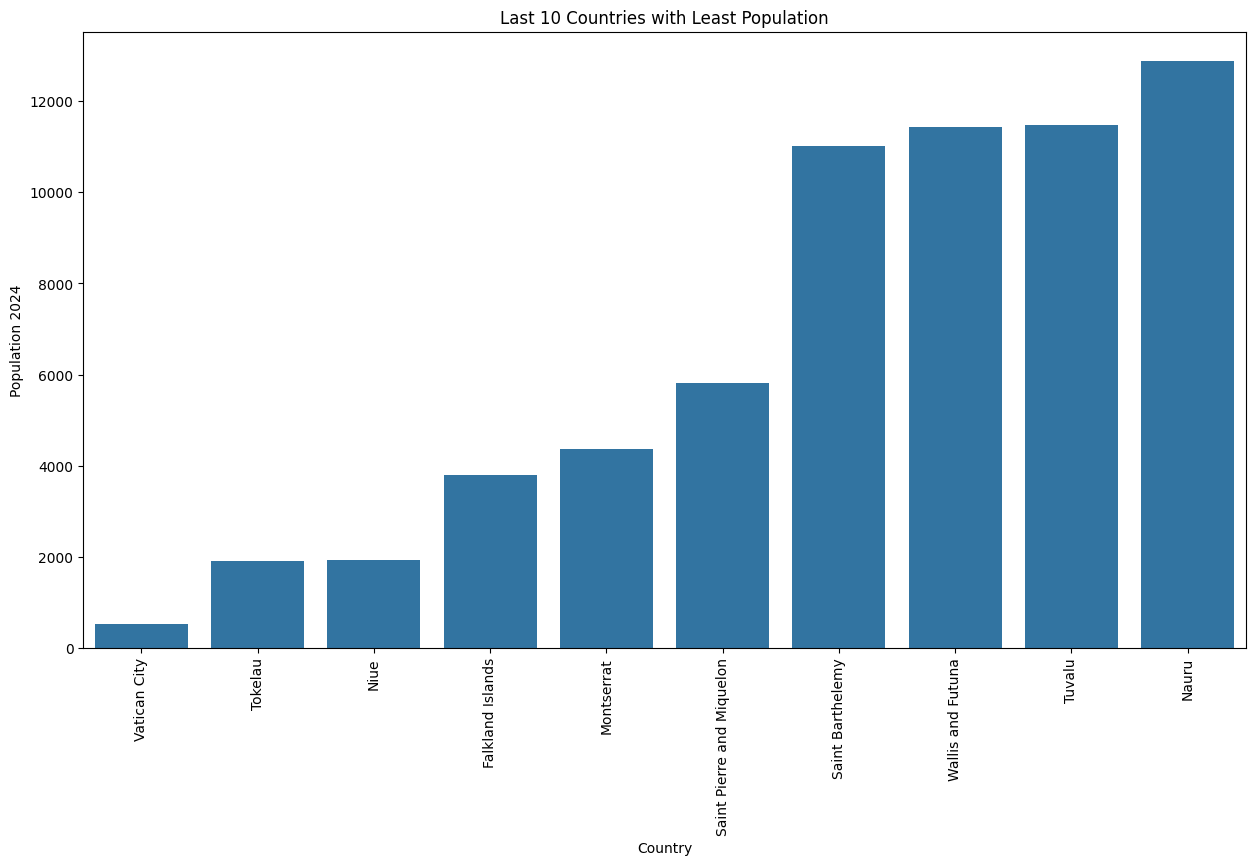

In [ ]:
#Last 10 countries with least population
plt.figure(figsize=(15,8))
sns.barplot(x = country_values[-10:],y = population_values[-10:])
plt.xticks(rotation=90)
plt.title("Last 10 Countries with Least Population")
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'Top 10 Countries with Highest Area')

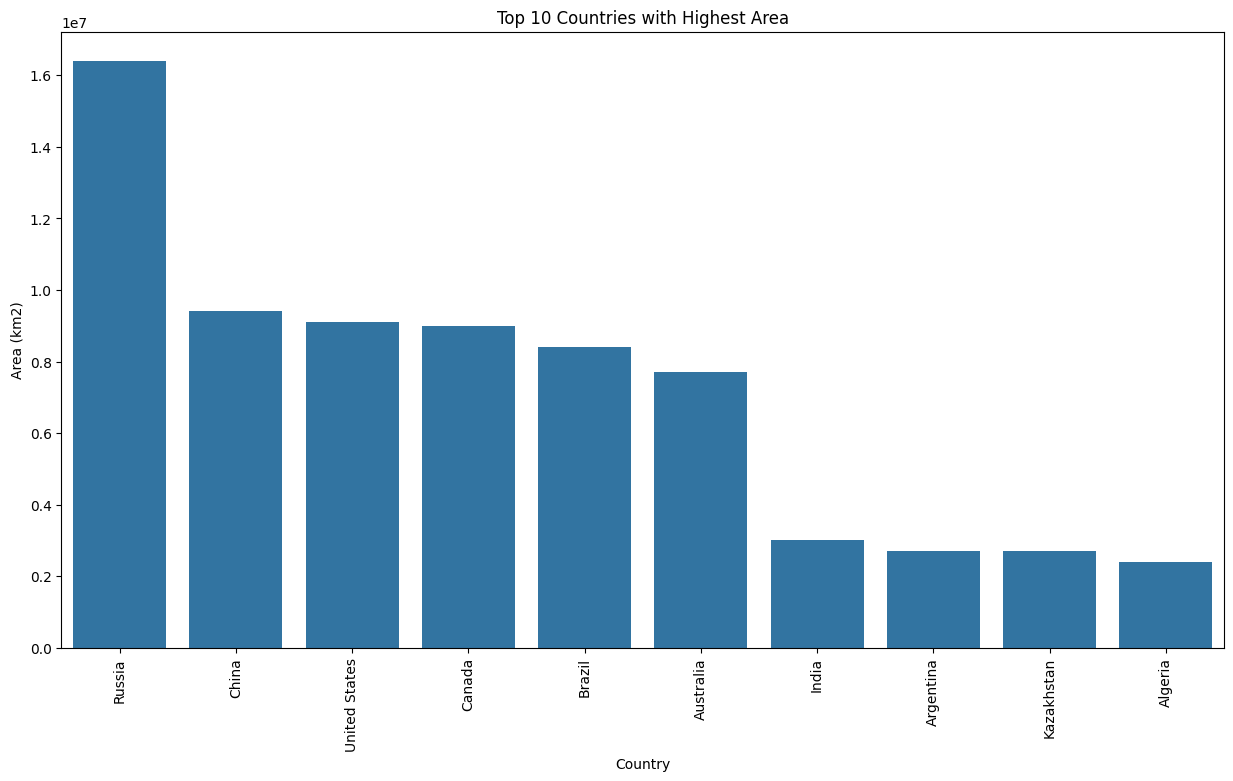

In [ ]:
df_area = df.sort_values(by='Area (km2)',ascending=False)
df_area.head()
area_values = df_area['Area (km2)']
plt.figure(figsize=(15,8))
sns.barplot(x = df_area['Country'][:10],y = area_values[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Countries with Highest Area")

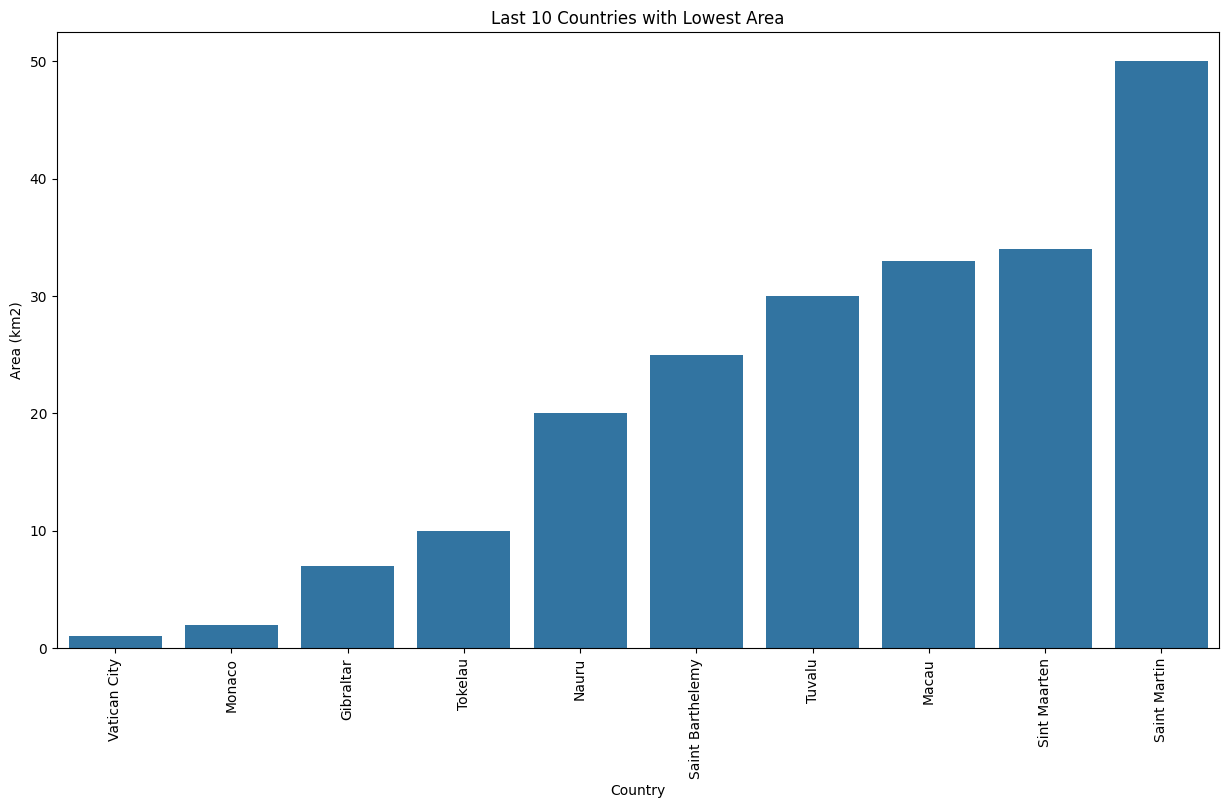

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = df_area['Country'][-10:],y = area_values[-10:])
plt.xticks(rotation=90)
plt.title("Last 10 Countries with Lowest Area")
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'Top 10 Countries with Highest Population Change')

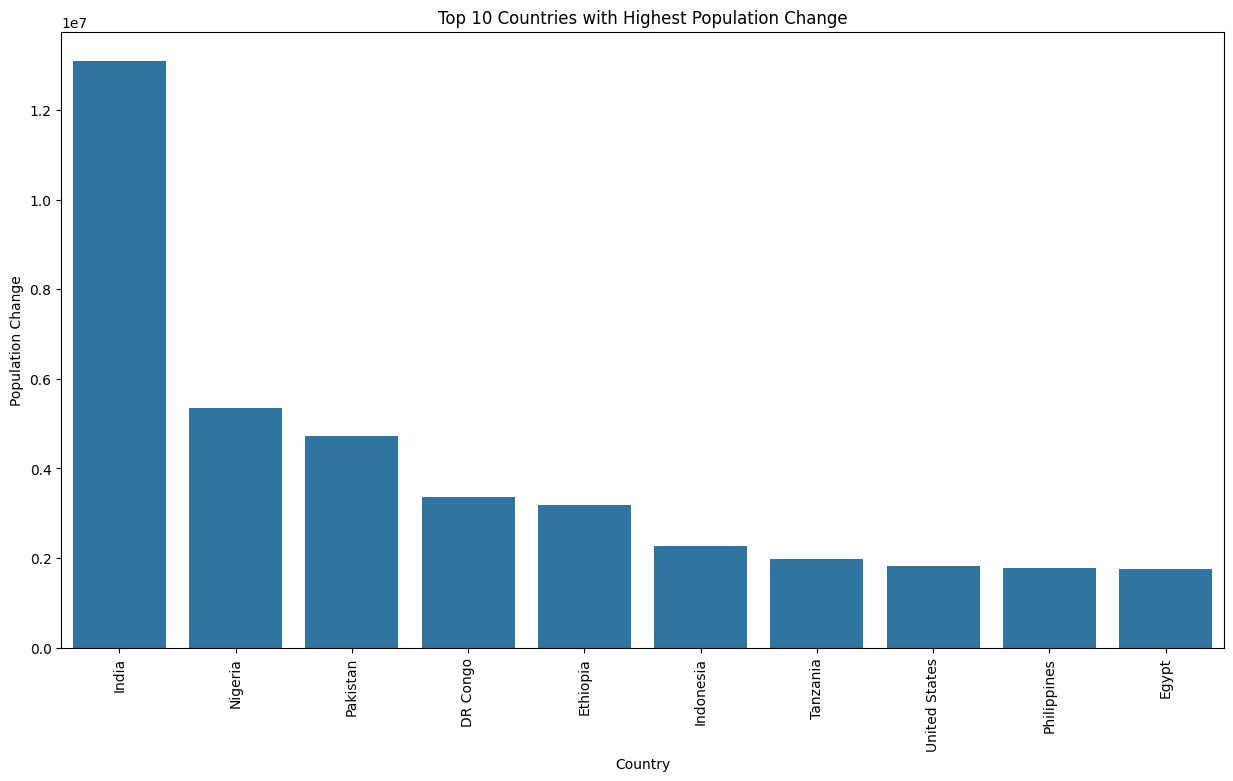

In [ ]:
df_change = df.sort_values(by='Population Change',ascending=False)
df_change.head()
change_values = df_change['Population Change']
plt.figure(figsize=(15,8))
sns.barplot(x = df_change['Country'][:10],y = change_values[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Countries with Highest Population Change")

(42, 8)


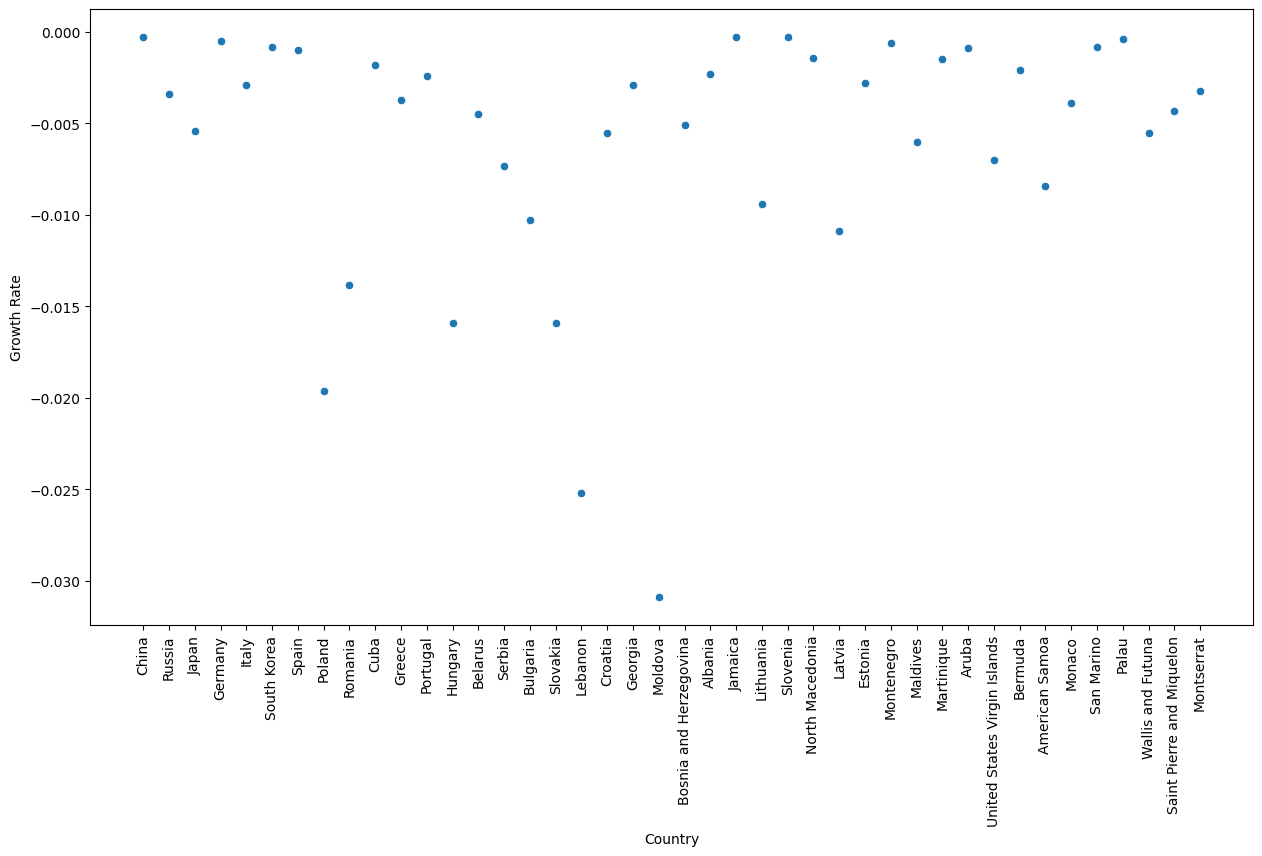

In [27]:
df_growth = df.sort_values(by='Growth Rate',ascending=True)
df_growth = df[df['Growth Rate'] < -1e-4]
print(df_growth.shape)
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_growth['Country'],y=df_growth['Growth Rate'])
plt.xticks(rotation=90)
plt.show()

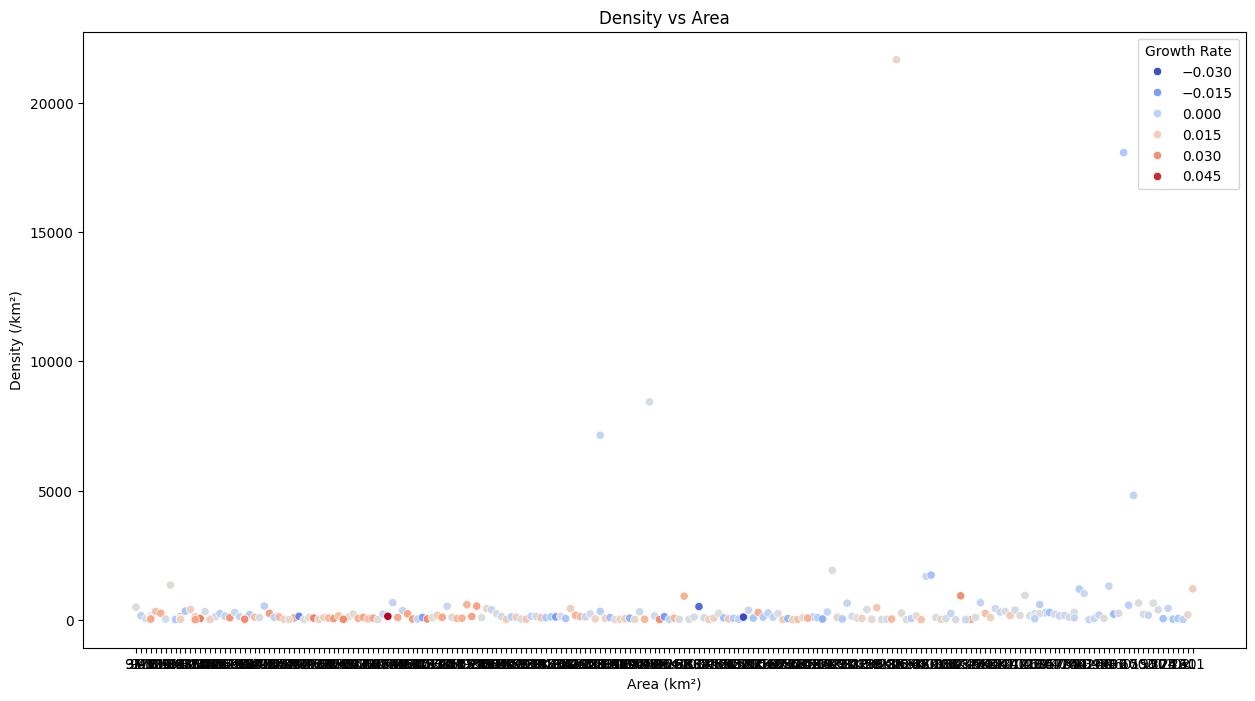

In [41]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=df,
    x='Area (km2)',
    y='Density (/km2)',
    hue='Growth Rate',
    palette='coolwarm'
)
plt.title("Density vs Area")
plt.xlabel("Area (km²)")
plt.ylabel("Density (/km²)")
plt.show()

#Observations
1. The Country with the highest Population is India
2. The Country with the lowest Population is Vatican City
3. The Country with the largest Area is Russia
4. The Country with the smallest area is Vatican City
5. India has the highest Population Increase
6. There are 42 countries with negetive growth like China,Russia etc
7. Country with the maximum negetive growth is Moldova
8. Countries with low Areas still have very dense population except some outliers like Russia,China
